E-commerce Dataset: Aim is to get the data ready for the model building by EDA and feature engineering

Problem Statement:

A retail company "ABC Private Limited" wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.
Now, they want to build a model to predict the purchase amount of customer against products which will help them to create personalized offer for customers against the products which will help them to create personalized offer for customers aganist different products.

Predict the ourchasing capacity of the customers based on the product

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
print(len(df))

550068


There are almost 0.5M rows of training data

In [4]:
dft=pd.read_csv('test.csv')

In [5]:
dft.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


Remember, it is always an efficient way to combine train and test sets to perform pre-processing

In [6]:
print(len(dft))

233599


There are almost 0.2M rows of test data

# Merging train and test data

In [7]:
df_new=pd.concat([df,dft],ignore_index=True)
df_new

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [8]:
df_new.drop(['User_ID'],axis=1,inplace=True)

Since Product_ID is unique, it can also be dropped

# Gender

We can even do it using one-hot encoding

In [9]:
df_new['Gender']=df_new['Gender'].map({'F':0,'M':1})
df_new

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,P00254642,0,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,P00031842,0,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,P00124742,0,46-50,1,C,4+,0,10,16.0,NaN,NaN


# Age

In [10]:
df_new['Age'].value_counts()

,count
Age,
26-35,313015
36-45,156724
18-25,141953
46-50,65278
51-55,54784
55+,30579
0-17,21334


Since there are 7 categories, doing one-hot enconding is not a suggestible action. Rather, ordinal or label encoding can be done.

I our case ordinal is preffered because in label enconding we fit_transform the data. Since fit_tranform should be applied only on train data, we go with ordinal encoding


In [11]:
#ordinal encoding
df_new['Age']=df_new['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

# City

In [12]:
df_city=pd.get_dummies(df_new['City_Category'],drop_first=True,dtype=int)

In [13]:
df_city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
783662,1,0
783663,1,0
783664,1,0
783665,0,1


In [14]:
df_cat=pd.concat([df_new,df_city],axis=1)

In [15]:
df_cat.drop(['City_Category'],axis=1,inplace=True)

In [16]:
df_cat

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,3,15,4+,1,8,NaN,NaN,NaN,1,0
783663,P00254642,0,3,15,4+,1,5,8.0,NaN,NaN,1,0
783664,P00031842,0,3,15,4+,1,1,5.0,12.0,NaN,1,0
783665,P00124742,0,5,1,4+,0,10,16.0,NaN,NaN,0,1


# Missing Values

In [17]:
df_cat.isnull().sum()

,0
Product_ID,0
Gender,0
Age,0
Occupation,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,245982
Product_Category_3,545809
Purchase,233599


The null values present in purchase column is due to test data



In [18]:
df_cat['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

These are discrete features. The same numbers are going to repeat

In [19]:
df_cat['Product_Category_2'].value_counts()

,count
Product_Category_2,
8.0,91317
14.0,78834
2.0,70498
16.0,61687
15.0,54114
5.0,37165
4.0,36705
6.0,23575
11.0,20230


The best way to replace missing values in categorical or numerical values is replacing with mode

In [20]:
 # replace missing values with mode
df_cat['Product_Category_2']=df_cat['Product_Category_2'].fillna(df_cat['Product_Category_2'].mode()[0])

In [21]:
df_cat['Product_Category_3']=df_cat['Product_Category_3'].fillna(df_cat['Product_Category_3'].mode()[0])

In [22]:
df_cat.isnull().sum()

,0
Product_ID,0
Gender,0
Age,0
Occupation,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0
Product_Category_3,0
Purchase,233599


In [23]:
df_cat['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

Simply replace 4+ with 4

In [26]:
df_cat['Stay_In_Current_City_Years']=df_cat['Stay_In_Current_City_Years'].str.replace('+','')

In [27]:
df_cat['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [28]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 71.7+ MB


In [30]:
df_cat['Stay_In_Current_City_Years']=df_cat['Stay_In_Current_City_Years'].astype(int)

In [31]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 71.7+ MB


# Visualization

In [32]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='Purchase'>

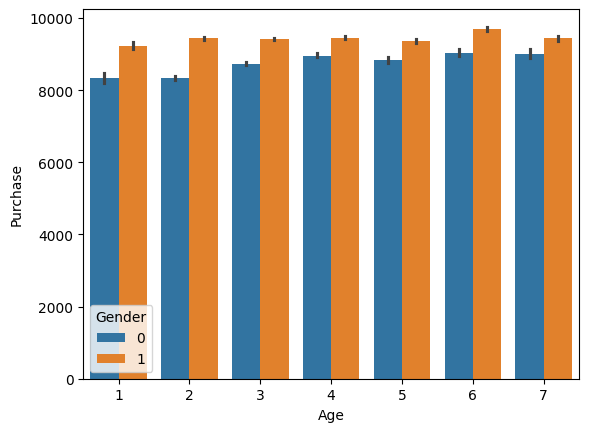

In [38]:
# Age vs. Purchase
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df_cat)

Observation:

1. The purchase capacity of men is more compared to women

<Axes: xlabel='Occupation', ylabel='Purchase'>

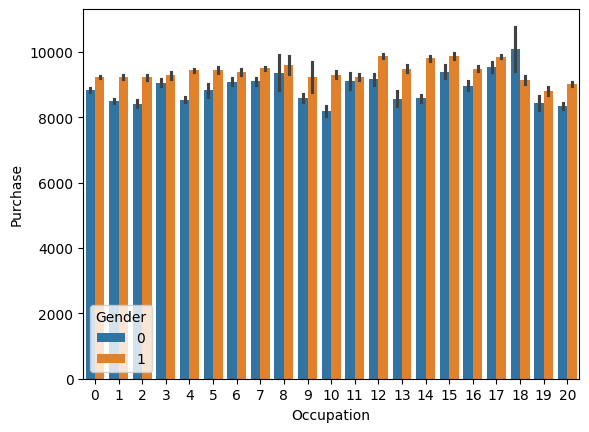

In [39]:
# Occupation vs. Purchase
sns.barplot(x='Occupation', y='Purchase', hue='Gender', data=df_cat)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

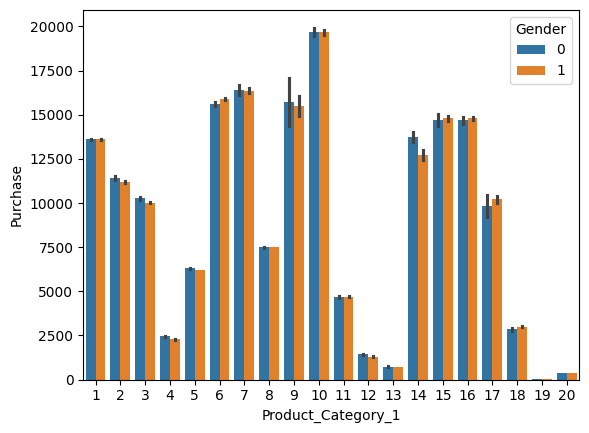

In [40]:
# Product category 1
sns.barplot(x='Product_Category_1', y='Purchase', hue='Gender', data=df_cat)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

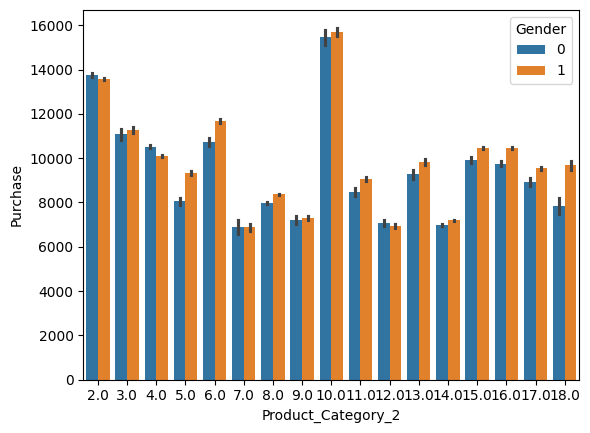

In [41]:
# Product category 2
sns.barplot(x='Product_Category_2', y='Purchase', hue='Gender', data=df_cat)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

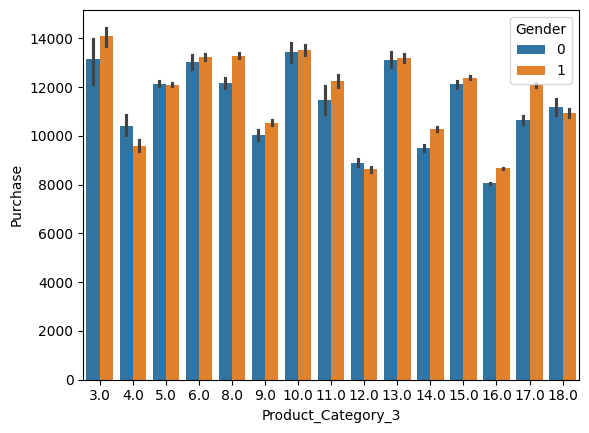

In [42]:
# Product category 3
sns.barplot(x='Product_Category_3', y='Purchase', hue='Gender', data=df_cat)

Product category 1 is purchased the most

# Feature Scaling

In [51]:
df_test= df_cat[df_cat['Purchase'].isnull()]
df_test.drop(['Product_ID'],axis=1,inplace=True)

<ipython-input-51-6da02b8faad3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['Product_ID'],axis=1,inplace=True)


In [50]:
df_train= df_cat[~df_cat['Purchase'].isnull()]
df_train.drop(['Product_ID'],axis=1,inplace=True)

<ipython-input-50-6aee82a8d55e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['Product_ID'],axis=1,inplace=True)


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('Purchase', axis=1),
                                                    df_train['Purchase'], test_size=0.3,
                                                    random_state=0)

In [53]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test)

array([[ 0.57223712, -1.10334289, -1.23893046, ...,  0.36853878,
        -0.85074187,  1.48615999],
       [ 0.57223712,  1.84882853, -1.08555071, ...,  0.36853878,
        -0.85074187, -0.67287506],
       [ 0.57223712, -0.36530004,  0.4482468 , ...,  0.00322387,
        -0.85074187,  1.48615999],
       ...,
       [ 0.57223712, -0.36530004, -1.23893046, ...,  0.36853878,
         1.17544467, -0.67287506],
       [ 0.57223712,  0.37274282,  1.21514556, ..., -2.18866562,
         1.17544467, -0.67287506],
       [ 0.57223712, -0.36530004,  1.36852531, ...,  0.36853878,
        -0.85074187,  1.48615999]])

Hooray!!!!

Data is now ready to train the model